# CE888 Assignment 1

This code is written as part of requirments of CE888 Data Science and Decision Making for Task 1 of Project 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 6 February 2019<br> 

In [2]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import original libraries
from sample import *

In [3]:
helloworld()

Hello World!


Feature names

In [4]:
file = "../data/human_activity/features.txt"
with open(file, 'r') as f:
    data = f.read()

# split data into lines
lines = data.split("\n")

# obtain feature names
feature_names = []

for line in lines:
    cells = line.split(" ")
    if len(cells) > 1: feature_names.append ("%s_%s" % (cells[0], cells[1]))

feature_names.append ("Class")

In [5]:
file_features = "../data/human_activity/train/X_train.txt"
with open(file_features, 'r') as f:
    data = f.read()

# split data into lines
lines = data.split("\n")

# split each lint into cells and obtain feature matrix
features = []

for line in lines:
    cells = line.split(" ")
    features.append(value for value in cells if value != "")
            
# convert the data into DataFrame
features_df = pd.DataFrame(features)

In [6]:
file_target = "../data/human_activity/train/y_train.txt"
with open(file_target, 'r') as f:
    data = f.read()

# split data into lines
targets = data.split("\n")
targets_df = pd.DataFrame(targets)

In [7]:
data_df = pd.concat ([features_df, targets_df], axis = 1)

# replace default column names with feature names
data_df.columns = feature_names

# replace string representations into numeric values
data_df = data_df.convert_objects(convert_numeric=True)
data_df.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


,1_tBodyAcc-mean()-X,2_tBodyAcc-mean()-Y,3_tBodyAcc-mean()-Z,4_tBodyAcc-std()-X,5_tBodyAcc-std()-Y,6_tBodyAcc-std()-Z,7_tBodyAcc-mad()-X,8_tBodyAcc-mad()-Y,9_tBodyAcc-mad()-Z,10_tBodyAcc-max()-X,...,553_fBodyBodyGyroJerkMag-skewness(),554_fBodyBodyGyroJerkMag-kurtosis(),"555_angle(tBodyAccMean,gravity)","556_angle(tBodyAccJerkMean),gravityMean)","557_angle(tBodyGyroMean,gravityMean)","558_angle(tBodyGyroJerkMean,gravityMean)","559_angle(X,gravityMean)","560_angle(Y,gravityMean)","561_angle(Z,gravityMean)",Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,5
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,5
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,5
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,5
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,5


In [8]:
count_nan = data_df.isnull().values.sum()
print("Number of NaN: %d" % count_nan)

if data_df.isnull().values.sum() != 0:
    print ("Count NaN in rows:\n", data_df.isnull().sum(axis=1))
    print ("Count NaN in columns:\n", data_df.isnull().sum())

Number of NaN: 0


In [9]:
data_df.shape

(7352, 562)

In [10]:
def histogram(data_df):
    num_cols = len(data_df.columns)

    # convert DataFrame to numpy array
    data = data_df.values

    # define figure grid
    if num_cols < 6: row, col = 1, num_cols
    else: row, col = num_cols//4+1, 4

    # create figure object
    fig = plt.figure(figsize = (col*5, row*3))
    
    # plot data
    for i in range(num_cols):
        plt.subplot (row, col, i+1)
        plt.title (data_df.columns[i])
        sns.distplot(data_df[data_df.columns[i]].values, kde=False, rug=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


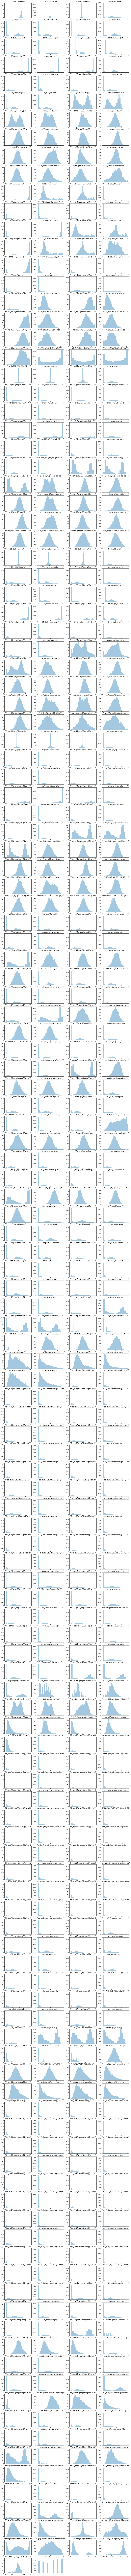

In [12]:
histogram(data_df)        

In [ ]:
def cr_heatmap(data_np, labels):
    size = len(labels) * 0.5
    fig = plt.figure(figsize = (size, size))
    hm = sns.heatmap(data_np, cbar = True, annot = True, square = True, 
                     fmt = '.2f', annot_kws = {'size': 8},
                     yticklabels = labels,
                     xticklabels = labels)
    plt.show ()

In [ ]:
# heatmap of the correlation coefficient matrix
cr = np.corrcoef (data_df.values.T)
cr_heatmap(cr, feature_names)

In [ ]:
def cr_bar_graph (data_np, feature_names):
    size_h = len (data_np)*0.5
    size_v = size_h * 0.5
    
    fig = plt.figure (figsize = (size_h, size_v))
    index = np.arange (len (data_np))
    plt.bar(index, data_np)
    plt.title ("Correlation Coefficient with the Label", fontsize = 10)
    plt.xlabel("Features", fontsize = 10)
    plt.xticks(index, feature_names, fontsize = 10, rotation = 90)
    plt.show ()

In [ ]:
cr_with_labels = cr[-1][:-1]
cr_bar_graph (cr_with_labels, feature_names)